In [ ]:
- Random Forest
- XGBoost
- GridSearch / Hyper Parameter Selection
- Pipelines
- Feature Selection
- Cross Validation

In [69]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("dark_background")


In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

wine_data = load_wine()
wine_df = pd.DataFrame(
    data=wine_data.data, 
    columns=wine_data.feature_names)
wine_df['target'] = wine_data.target

In [71]:
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [72]:
from sklearn.model_selection import train_test_split

X = wine_df.drop(['target'], axis=1)
y = wine_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    shuffle=True, 
                                                    stratify=y)


In [73]:
X_train.var(axis=0)

alcohol                              0.670848
malic_acid                           1.240686
ash                                  0.067152
alcalinity_of_ash                   11.571904
magnesium                          221.349790
total_phenols                        0.429337
flavanoids                           1.066487
nonflavanoid_phenols                 0.015073
proanthocyanins                      0.338557
color_intensity                      4.912724
hue                                  0.048756
od280/od315_of_diluted_wines         0.496062
proline                         100580.161290
dtype: float64

In [74]:
from sklearn.preprocessing import Normalizer
norm = Normalizer().fit(X_train)
norm_X_train = norm.transform(X_train)
norm_X_train.var(axis=0)

array([4.95045950e-05, 5.69816716e-06, 1.80831379e-06, 2.03597936e-04,
       2.76202852e-03, 2.02614109e-06, 2.94491819e-06, 1.01113496e-07,
       1.36668099e-06, 1.20995519e-05, 4.59856334e-07, 3.51909004e-06,
       9.28832233e-05])

In [75]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold = 1e-6)
selected_features = selector.fit_transform(norm_X_train)
selected_features.shape

(124, 11)

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train)

preds = dt.predict(X_test)
f1_score_all = round(f1_score(y_test, preds, average='weighted'),3)

X_train_sel = X_train.drop(['hue', 'nonflavanoid_phenols'], axis=1)
X_test_sel = X_test.drop(['hue', 'nonflavanoid_phenols'], axis=1)
dt.fit(X_train_sel, y_train)
preds_sel = dt.predict(X_test_sel)
f1_score_sel = round(f1_score(y_test, preds_sel, average='weighted'), 3)
f1_score_sel

0.926

In [77]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_train_v2, X_test_v2, y_train_v2, y_test_v2 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()
f1_score_list = []
for k in range(1, 14):
    selector = SelectKBest(chi2, k=k)
    selector.fit(X_train_v2, y_train_v2)
    
    sel_X_train_v2 = selector.transform(X_train_v2)
    sel_X_test_v2 = selector.transform(X_test_v2)
    
    dt.fit(sel_X_train_v2, y_train_v2)
    kbest_preds = dt.predict(sel_X_test_v2)
    f1_score_kbest = round(f1_score(y_test, kbest_preds, average='weighted'), 3)
    f1_score_list.append(f1_score_kbest)

print(f1_score_list)

[0.633, 0.849, 0.927, 0.927, 0.908, 0.927, 0.927, 0.927, 0.927, 0.926, 0.926, 0.907, 0.926]


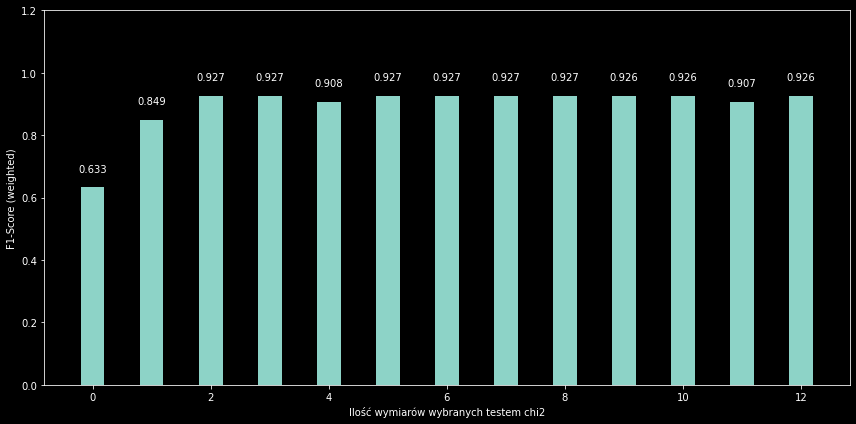

In [78]:
fig, ax = plt.subplots(figsize=(12, 6))
x = list(range(0,13))
y = f1_score_list
ax.bar(x, y, width=0.4)
ax.set_xlabel('Ilość wymiarów wybranych testem chi2')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1.2)
for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.05, s=str(value), ha='center')
    
plt.tight_layout()

In [97]:
from sklearn.datasets import make_classification

X, y= make_classification(n_samples=1000, n_features=20, n_informative=5, n_redundant=5, n_repeated=5, n_classes=2)

pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.362645,-0.760330,-0.843497,-0.206964,-0.206964,0.866374,-0.180576,0.014053,1.404847,1.003955,-0.482673,-0.250779,0.362645,-1.108777,0.014053,-0.843497,1.159157,0.609197,-0.180576,-0.727899
1,-0.721569,1.512065,1.289491,1.967123,1.967123,-0.391330,0.511427,2.760391,0.942796,-1.284501,1.060989,0.128471,-0.721569,-0.022304,2.760391,1.289491,-0.080016,0.943319,0.511427,0.098011
2,1.421127,0.738205,-2.677053,-1.481269,-1.481269,0.593585,-0.903246,-4.265176,-1.126763,-5.117790,-4.217440,-0.057890,1.421127,1.490357,-4.265176,-2.677053,-1.810058,1.426433,-0.903246,-0.206741
3,-0.940719,0.300659,-2.348854,-1.804258,-1.804258,0.659347,0.250242,-2.187213,1.464582,-1.363038,-2.120479,0.119247,-0.940719,1.190961,-2.187213,-2.348854,-1.500521,-1.397717,0.250242,0.220630
4,2.008126,2.997236,-1.130124,0.840062,0.840062,-0.726841,-1.363544,0.128027,0.579338,-3.615423,-0.025094,0.139212,2.008126,-0.411214,0.128027,-1.130124,-1.607300,0.312631,-1.363544,-1.069081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.201924,1.277571,0.243582,1.631011,1.631011,0.660084,0.260515,1.625247,-0.473664,-2.574263,-0.635348,-0.115951,-0.201924,-0.075559,1.625247,0.243582,0.120789,-0.191668,0.260515,-0.035862
996,-0.245041,-0.813736,0.775579,0.951746,0.951746,1.284191,0.299094,2.083910,0.424127,2.211938,1.114541,-0.865778,-0.245041,-1.455899,2.083910,0.775579,1.865465,0.601767,0.299094,0.551256
997,1.865598,-2.344626,2.478475,1.589661,1.589661,-1.884977,-0.380322,0.167065,-0.794446,0.355197,-0.410347,0.330996,1.865598,-1.038491,0.167065,2.478475,2.954961,0.190177,-0.380322,0.421459
998,-0.494736,0.874499,2.751996,2.149140,2.149140,-0.636011,0.608534,1.842749,1.816531,-2.111438,0.751066,0.738884,-0.494736,1.068356,1.842749,2.751996,-0.229614,-1.163316,0.608534,-0.447116


---
# <span style="color: magenta">Ćwiczenie - w powyższym zbiorze jest 5 przydatnych kolumn. Zastosować mechanizmy selekcji wymiarów do redukcji w/w tabeli do 5 mymiarów</span>
---

In [79]:
from sklearn.feature_selection import RFE

X_train_v3, X_test_v3, y_train_v3, y_test_v3 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()
RFE_selector = RFE(estimator=dt, n_features_to_select=4, step=1)
RFE_selector.fit(X_train_v3, y_train_v3)

RFE(estimator=DecisionTreeClassifier(random_state=42), n_features_to_select=4)

In [80]:
X_train_v3.columns[RFE_selector.support_]

Index(['flavanoids', 'color_intensity', 'hue', 'proline'], dtype='object')

In [81]:
sel_X_train_v3 = RFE_selector.transform(X_train_v3)
sel_X_test_v3 = RFE_selector.transform(X_test_v3)
dt.fit(sel_X_train_v3, y_train_v3)
RFE_preds = dt.predict(sel_X_test_v3)
rfe_f1_score = round(f1_score(y_test_v3, RFE_preds, average='weighted'),3)
print(rfe_f1_score)

0.907


In [82]:
from sklearn.feature_selection import SelectFromModel

X_train_v4, X_test_v4, y_train_v4, y_test_v4 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

sfm_selector = SelectFromModel(estimator=DecisionTreeClassifier())
sfm_selector.fit(X_train_v4,  y_train_v4)

SelectFromModel(estimator=DecisionTreeClassifier())

In [83]:
X.columns[sfm_selector.get_support()]

Index(['flavanoids', 'color_intensity', 'proline'], dtype='object')

In [84]:
sel_X_train_v4 = sfm_selector.transform(X_train_v4)
sel_X_test_v4 = sfm_selector.transform(X_test_v4)

dt.fit(sel_X_train_v4, y_train_v4)
sfm_preds = dt.predict(sel_X_test_v4)
sfm_f1_score = round(f1_score(y_test_v4, sfm_preds, average='weighted'),3)
print(rfe_f1_score)

0.907


---
# <span style="color: magenta">Ćwiczenie - w klasyfikatorze spamu z wczoraj, zredukować ilość wymiarów w `DecisionTreeClassifier`. </span>

# <span style="color: magenta">Ćwiczenie - Wyświetlić tak uproszczone drzewo. </span>
---

# Pipeline

In [98]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

ppln_clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC())),
  ('classification', DecisionTreeClassifier())
])
ppln_clf.fit(X_train, y_train)

Pipeline(steps=[('feature_selection', SelectFromModel(estimator=LinearSVC())),
                ('classification', DecisionTreeClassifier())])

In [99]:
ppln_preds = ppln_clf.predict(X_test)
ppln_f1_score = round(f1_score(y_test, ppln_preds, average='weighted'),3)
ppln_f1_score

0.926

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

ppln_clf = Pipeline([
  ('feature_selection', SelectKBest(chi2, k=4)),
  ('classification', DecisionTreeClassifier())
])
ppln_clf.fit(X_train, y_train)

Pipeline(steps=[('feature_selection',
                 SelectKBest(k=4,
                             score_func=<function chi2 at 0x0000025473F983A0>)),
                ('classification', DecisionTreeClassifier())])

In [101]:
ppln_preds = ppln_clf.predict(X_test)
ppln_f1_score = round(f1_score(y_test, ppln_preds, average='weighted'),3)
ppln_f1_score

0.908

---
# <span style="color: magenta">Ćwiczenie - Przerobić kod z poprzedniego ćwiczenia w `pipeline` </span>
---

In [52]:
import pandas as pd

data = pd.read_csv('data/adverts_29_04.csv', sep=';')
data['cena_za_metr'] = data['Cena'] / data['Wielkość (m2)']
data = data.dropna(subset=['cena_za_metr'])
df = data.drop(['Cena', 'Data dodania'], axis=1)
df

,Lokalizacja,Na sprzedaż przez,Rodzaj nieruchomości,Liczba pokoi,Liczba łazienek,Wielkość (m2),opis,Parking,cena_za_metr
0,"Praga Północ, Warszawa",Właściciel,Mieszkanie,4 pokoje,1 łazienka,50.0,CO] - gotowiec inwestycyjny KUP I ZARABIAJ \n\...,NaN,10380.000000
1,"Wilanów, Warszawa",Właściciel,Mieszkanie,2 pokoje,1 łazienka,53.0,Sprzedam mieszkanie 2 pokoje 53m2 w\r\nMiastec...,Ulica,11679.245283
2,"Wilanów, Warszawa",Właściciel,Mieszkanie,3 pokoje,2 łazienki,90.0,Sprzedam komfortowo urządzone mieszkanie o pow...,Garaż,10555.555556
3,"Śródmieście, Warszawa",Agencja,Mieszkanie,2 pokoje,NaN,55.0,Agencja WN pracuje podczas pandemii. Prowadzim...,Brak,11909.090909
4,"Wola, Warszawa",Agencja,Mieszkanie,2 pokoje,1 łazienka,45.0,"BLISKA WOLA , komfortowy 2- pokojowy apartamen...",NaN,12805.511111
...,...,...,...,...,...,...,...,...,...
982,"Bemowo, Warszawa",Agencja,Mieszkanie,3 pokoje,NaN,74.0,Mieszkanie Bemowo przy budowanym metrze\n\nNa ...,NaN,9445.945946
983,"Mokotów, Warszawa",Agencja,Mieszkanie,3 pokoje,NaN,66.0,"Blok z wielkiej płyty z roku 1992, PO REMONCIE...",NaN,9772.727273
984,"Wawer, Warszawa",Agencja,Dom,4 pokoje,NaN,160.0,Na sprzedaż nowoczesny dom 4-pokojowy w zabud...,NaN,8625.000000
985,"Bemowo, Warszawa",Agencja,Mieszkanie,3 pokoje,NaN,73.0,Na sprzedaż mieszkanie w apartamentowcu wybud...,NaN,7794.520548


In [53]:
dum_df = pd.get_dummies(df, columns=['Lokalizacja', 'Na sprzedaż przez', 'Rodzaj nieruchomości', 'Liczba pokoi', 'Liczba łazienek', 'Parking'])
dum_df

,Wielkość (m2),opis,cena_za_metr,"Lokalizacja_Bemowo, Warszawa","Lokalizacja_Białołęka, Warszawa","Lokalizacja_Bielany, Warszawa","Lokalizacja_Mokotów, Warszawa","Lokalizacja_Ochota, Warszawa","Lokalizacja_Praga Południe, Warszawa","Lokalizacja_Praga Północ, Warszawa",...,Liczba pokoi_6 lub więcej pokoi,Liczba pokoi_Kawalerka lub garsoniera,Liczba łazienek_1 łazienka,Liczba łazienek_2 łazienki,Liczba łazienek_3 łazienki,Liczba łazienek_4 lub więcej łazienek,Parking_Brak,Parking_Garaż,Parking_Kryty,Parking_Ulica
0,50.0,CO] - gotowiec inwestycyjny KUP I ZARABIAJ \n\...,10380.000000,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,53.0,Sprzedam mieszkanie 2 pokoje 53m2 w\r\nMiastec...,11679.245283,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,90.0,Sprzedam komfortowo urządzone mieszkanie o pow...,10555.555556,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,55.0,Agencja WN pracuje podczas pandemii. Prowadzim...,11909.090909,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,45.0,"BLISKA WOLA , komfortowy 2- pokojowy apartamen...",12805.511111,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,74.0,Mieszkanie Bemowo przy budowanym metrze\n\nNa ...,9445.945946,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
983,66.0,"Blok z wielkiej płyty z roku 1992, PO REMONCIE...",9772.727273,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
984,160.0,Na sprzedaż nowoczesny dom 4-pokojowy w zabud...,8625.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
985,73.0,Na sprzedaż mieszkanie w apartamentowcu wybud...,7794.520548,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
dum_df.columns

Index(['Wielkość (m2)', 'opis', 'cena_za_metr', 'Lokalizacja_Bemowo, Warszawa',
       'Lokalizacja_Białołęka, Warszawa', 'Lokalizacja_Bielany, Warszawa',
       'Lokalizacja_Mokotów, Warszawa', 'Lokalizacja_Ochota, Warszawa',
       'Lokalizacja_Praga Południe, Warszawa',
       'Lokalizacja_Praga Północ, Warszawa', 'Lokalizacja_Rembertów, Warszawa',
       'Lokalizacja_Targówek, Warszawa', 'Lokalizacja_Ursus, Warszawa',
       'Lokalizacja_Ursynów, Warszawa', 'Lokalizacja_Wawer, Warszawa',
       'Lokalizacja_Wesoła, Warszawa', 'Lokalizacja_Wilanów, Warszawa',
       'Lokalizacja_Wola, Warszawa', 'Lokalizacja_Włochy, Warszawa',
       'Lokalizacja_Śródmieście, Warszawa', 'Lokalizacja_Żoliborz, Warszawa',
       'Na sprzedaż przez_Agencja', 'Na sprzedaż przez_Właściciel',
       'Rodzaj nieruchomości_Dom', 'Rodzaj nieruchomości_Inne',
       'Rodzaj nieruchomości_Mieszkanie', 'Liczba pokoi_2 pokoje',
       'Liczba pokoi_3 pokoje', 'Liczba pokoi_4 pokoje',
       'Liczba pokoi_5 pokoi

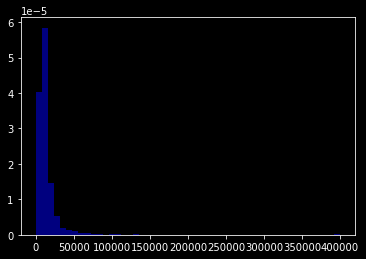

In [55]:
import matplotlib.pyplot as plt

plt.hist(dum_df['cena_za_metr'], 50,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()

In [56]:
dum_df.drop(dum_df[dum_df.cena_za_metr >30000.0].index, inplace=True)

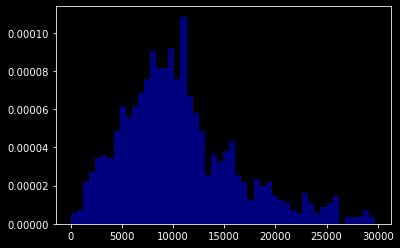

In [57]:
import matplotlib.pyplot as plt

plt.hist(dum_df['cena_za_metr'], 50,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()

In [58]:
dum_df.corr()['cena_za_metr']

Wielkość (m2)                           -0.064497
cena_za_metr                             1.000000
Lokalizacja_Bemowo, Warszawa            -0.018889
Lokalizacja_Białołęka, Warszawa         -0.159826
Lokalizacja_Bielany, Warszawa            0.003766
Lokalizacja_Mokotów, Warszawa            0.131210
Lokalizacja_Ochota, Warszawa            -0.018932
Lokalizacja_Praga Południe, Warszawa     0.002441
Lokalizacja_Praga Północ, Warszawa       0.021179
Lokalizacja_Rembertów, Warszawa         -0.100811
Lokalizacja_Targówek, Warszawa          -0.036512
Lokalizacja_Ursus, Warszawa             -0.074461
Lokalizacja_Ursynów, Warszawa           -0.062382
Lokalizacja_Wawer, Warszawa             -0.141669
Lokalizacja_Wesoła, Warszawa            -0.151450
Lokalizacja_Wilanów, Warszawa           -0.085052
Lokalizacja_Wola, Warszawa               0.055272
Lokalizacja_Włochy, Warszawa            -0.031444
Lokalizacja_Śródmieście, Warszawa        0.323234
Lokalizacja_Żoliborz, Warszawa           0.045081


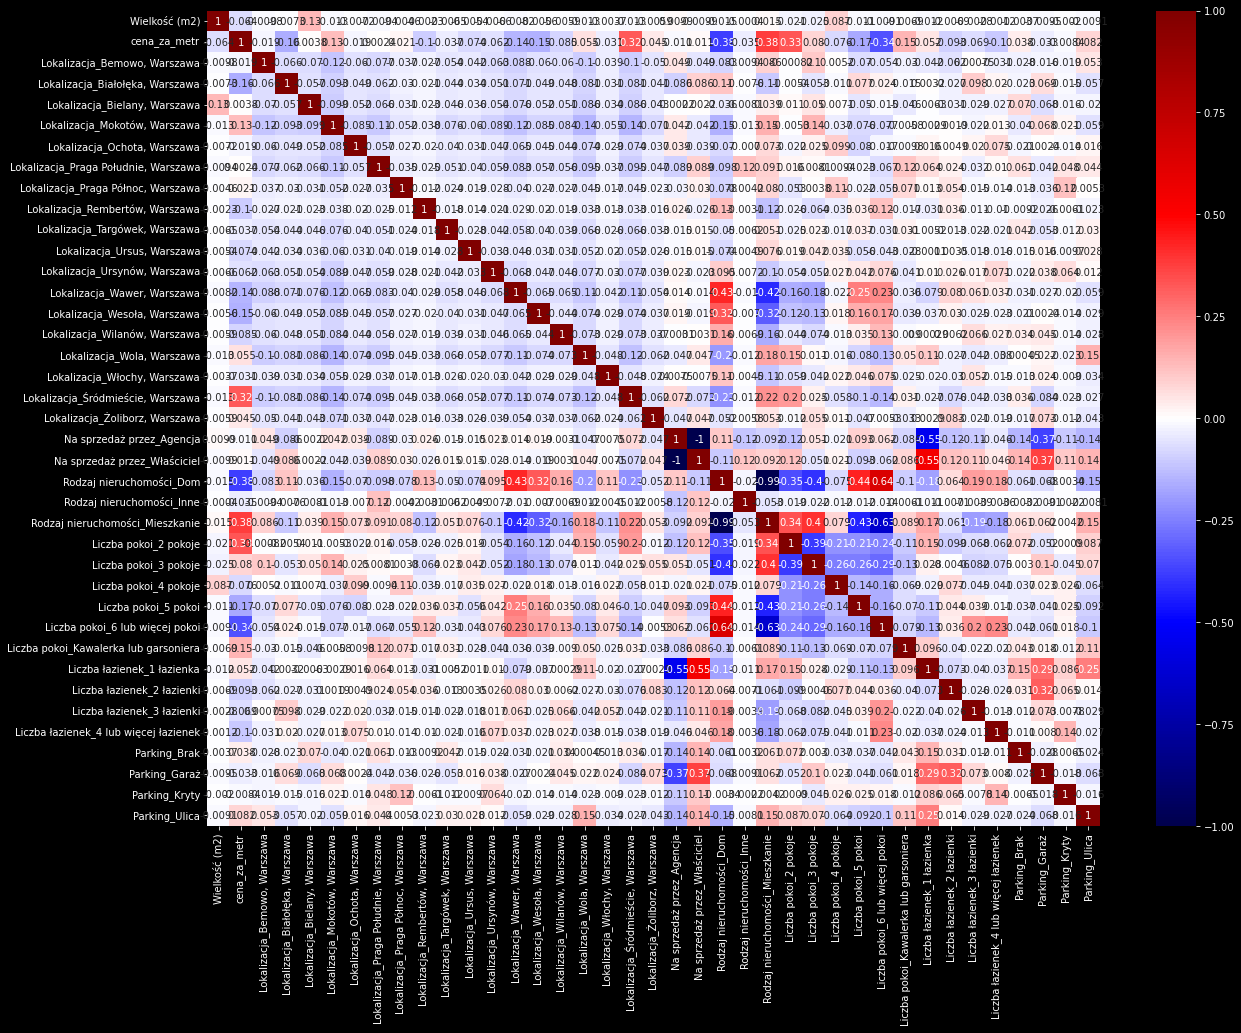

In [59]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(20,15))
plt.style.use("dark_background")

sns.heatmap(dum_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

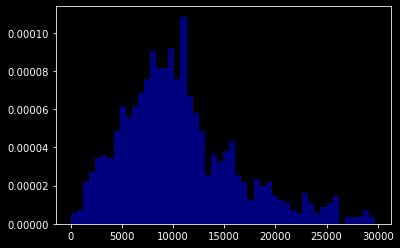

In [60]:
plt.hist(dum_df['cena_za_metr'], 50,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()

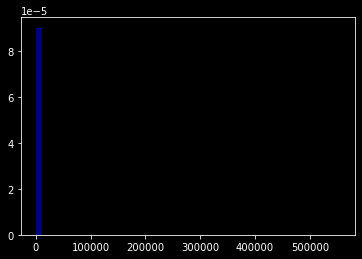

In [61]:
plt.hist(dum_df['Wielkość (m2)'], 50,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()

In [62]:
dum_df.drop(dum_df[dum_df['Wielkość (m2)'] >1000.0].index, inplace=True)

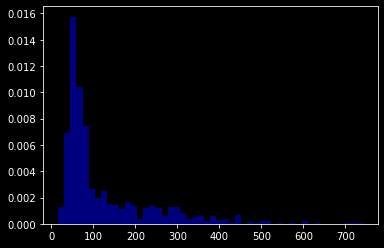

In [63]:
plt.hist(dum_df['Wielkość (m2)'], 50,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()

In [64]:
dum_df.drop(dum_df[dum_df['Wielkość (m2)'] >300.0].index, inplace=True)
dum_df

,Wielkość (m2),opis,cena_za_metr,"Lokalizacja_Bemowo, Warszawa","Lokalizacja_Białołęka, Warszawa","Lokalizacja_Bielany, Warszawa","Lokalizacja_Mokotów, Warszawa","Lokalizacja_Ochota, Warszawa","Lokalizacja_Praga Południe, Warszawa","Lokalizacja_Praga Północ, Warszawa",...,Liczba pokoi_6 lub więcej pokoi,Liczba pokoi_Kawalerka lub garsoniera,Liczba łazienek_1 łazienka,Liczba łazienek_2 łazienki,Liczba łazienek_3 łazienki,Liczba łazienek_4 lub więcej łazienek,Parking_Brak,Parking_Garaż,Parking_Kryty,Parking_Ulica
0,50.0,CO] - gotowiec inwestycyjny KUP I ZARABIAJ \n\...,10380.000000,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,53.0,Sprzedam mieszkanie 2 pokoje 53m2 w\r\nMiastec...,11679.245283,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,90.0,Sprzedam komfortowo urządzone mieszkanie o pow...,10555.555556,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,55.0,Agencja WN pracuje podczas pandemii. Prowadzim...,11909.090909,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,45.0,"BLISKA WOLA , komfortowy 2- pokojowy apartamen...",12805.511111,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,74.0,Mieszkanie Bemowo przy budowanym metrze\n\nNa ...,9445.945946,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
983,66.0,"Blok z wielkiej płyty z roku 1992, PO REMONCIE...",9772.727273,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
984,160.0,Na sprzedaż nowoczesny dom 4-pokojowy w zabud...,8625.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
985,73.0,Na sprzedaż mieszkanie w apartamentowcu wybud...,7794.520548,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---
# Regresja

In [65]:
from sklearn.linear_model import LinearRegression

y = dum_df['cena_za_metr']
X = dum_df.drop(['opis', 'cena_za_metr'], axis=1)

reg = LinearRegression().fit(X, y)

In [66]:
reg.score(X, y)

0.3296082989738536

# $R^2$

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=17)https://en.wikipedia.org/wiki/Coefficient_of_determination

Współczynnik determinacji - Jaka część wariancji zmiennej objaśnianej jest pochodzi od zmiennych tłumaczących

- 1.0 - Idealnie dopasowania
- 0.0 - Funkcja stała
- ... ale może być i ujemna

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=17)
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.39766665409217516

---
## Walidacja krzyżowa

![Walidacja krzyżowa](img\xvi.png)

https://scikit-learn.org/stable/modules/cross_validation.html

In [17]:
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=17)
scores = cross_val_score(LinearRegression(), X_train, y_train, cv=10)
print(list(scores))
print()
print("Mean r^2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.17158512004468074, 0.40024648668175655, 0.2976342708945746, 0.043191642458777935, 0.17997914817010796, 0.27370651738767693, 0.3253537829750235, 0.3218428060850048, 0.30400936121495503, 0.19406005442364682]

Mean r^2: 0.25 (+/- 0.20)


## Zmiana techniki scoringu

In [18]:
from sklearn.metrics import mean_squared_error, make_scorer


scores = cross_val_score(LinearRegression(), X_train, y_train, scoring=make_scorer(mean_squared_error), cv=5)
print(list(scores))
print()
print("Mean square error: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[20873390.527972087, 25559567.18934256, 25310897.709129546, 19026992.9808826, 22484301.02710871]

Mean square error: 22651029.89 (+/- 5048241.66)


## Zmiana regresora

In [19]:
from sklearn.svm import SVR

scores = cross_val_score(SVR(kernel='linear', C=1000), X_train, y_train, cv=5)
print(list(scores))
print()
print("Mean r^2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.23804952563512416, 0.2115884023493967, 0.20975205178843537, 0.33793253114553534, 0.22722899401284613]

Mean r^2: 0.24 (+/- 0.10)


In [20]:
from sklearn.svm import SVR

scores = cross_val_score(SVR(kernel='linear', C=10), X_train, y_train, cv=5)
print(list(scores))
print()
print("Mean r^2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.09718015300245486, 0.13447686226472266, 0.06553996977054632, 0.047308104255851635, 0.054904832313382945, 0.1353735243204418, 0.2743855846866866, 0.25574009159845246, 0.1129608517005416, 0.1771435422279699]

Mean r^2: 0.14 (+/- 0.15)


In [21]:
from sklearn.svm import SVR

scores = cross_val_score(SVR(kernel='linear', C=100), X_train, y_train, cv=5)
print(list(scores))
print()
print("Mean r^2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.12862151646914632, 0.3113907072961939, 0.17909707094002536, 0.12948022762378208, 0.10917750563785855, 0.2568224526141897, 0.3651580703359949, 0.3160762412139826, 0.19159434824947652, 0.23152875742223467]

Mean r^2: 0.22 (+/- 0.17)


In [27]:
from sklearn.svm import SVR

scores = cross_val_score(SVR(kernel='rbf', C=1000), X_train, y_train, cv=5)
print(list(scores))
print()
print("Mean r^2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.0918468525567262, 0.052461127912378225, 0.045233257591872134, 0.2682718351774165, 0.12757846391295946]

Mean r^2: 0.12 (+/- 0.16)


In [23]:
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import SVR

scores = cross_val_score(GradientBoostingRegressor(), X_train, y_train, cv=10)
print(list(scores))
print()
print("Mean r^2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.05070084378557527, 0.33891814450792146, 0.1671721004896337, 0.05639395854378115, 0.19520132311655125, 0.2777618081648109, 0.43164699120914707, 0.2206896736069185, 0.26717205806801325, 0.12923960077808594]

Mean r^2: 0.21 (+/- 0.23)


## Hiperparametry
### `C` - współczynnik regularyzacji - odwrotność siły regularyzacji czyli __*"czynienia rozwiązania prostszym"*__


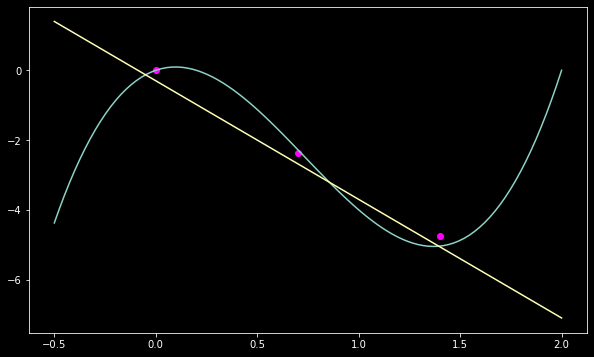

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("dark_background")
plt.figure(figsize=(10,6))
x = np.linspace(-0.5, 2, 100)
plt.plot(x, x*(5*x-1)*(x-2))
y = np.linspace(0, 1.4, 3)
plt.scatter(y, -3.4*y, color="#FF00FF");
z = np.linspace(-0.5, 2, 50)
plt.plot(z, -3.4*z-0.3);

## Pipeline

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from warnings import simplefilter
simplefilter(action='ignore', category=DeprecationWarning)

pipe = Pipeline([
    ('scale',  'passthrough'),
    ('regression', SVR())
])



In [17]:
pipe.set_params(regression__C=10)

Pipeline(steps=[('scale', 'passthrough'), ('regression', SVR(C=10))])

In [18]:
param_grid = dict(regression__C=[0.1, 10, 100])

In [19]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(pipe, param_grid, verbose=1, cv=3)
grid_search

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', 'passthrough'),
                                       ('regression', SVR(C=10))]),
             param_grid={'regression__C': [0.1, 10, 100]}, verbose=1)

## Scalers
- StandardScaler (standardyzacja - odejmuję średnia, dzieli przez wariancję)
- Normalizer (normalizacja - dzieli przez długość - sprowadza do wektora o normie 1)
- RobustScaler (odejmuje medianę i skaluje kwartylami)

In [20]:
from time import time

param_grid = dict( 
    scale=['passthrough', StandardScaler(), Normalizer()],
    regression__C=[ 10, 100],
    regression__kernel=['linear']
)
                  
print(param_grid)

###################################

grid_search = GridSearchCV(pipe, param_grid, verbose=1, cv=5, n_jobs=2)

###################################

t0 = time()
grid_search.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
print()
print("Best parameters set:")
print(grid_search.best_estimator_)
print()
print(f"Best score: {grid_search.best_score_}")

{'scale': ['passthrough', StandardScaler(), Normalizer()], 'regression__C': [10, 100], 'regression__kernel': ['linear']}
Fitting 5 folds for each of 6 candidates, totalling 30 fits
done in 5.344s

Best parameters set:
Pipeline(steps=[('scale', StandardScaler()),
                ('regression', SVR(C=100, kernel='linear'))])

Best score: 0.09098562470536739


- 5 - Walidacja krzyżowa
- 2 - parametry $C$
- 3 - scaler

$ 5 * 2 * 3 = 30 $ przebiegów

In [ ]:
https://www.kaggle.com/datasets/yufengsui/portuguese-bank-marketing-data-set

In [145]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [146]:
bank_data = pd.read_csv('data/bank-full.csv', sep=';')
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [147]:
bank_data['default'] = bank_data['default'].map({'no':0,'yes':1,'unknown':0})

bank_data['y'] = bank_data['y'].map({'no':0,'yes':1})
bank_data['housing'] = bank_data['housing'].map({'no':0,'yes':1})
bank_data['loan'] = bank_data['loan'].map({'no':0,'yes':1})
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [148]:
bank_data = pd.get_dummies(bank_data, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'])
bank_data

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [149]:
X = bank_data.drop('y', axis=1)
y = bank_data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [150]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [151]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9029083268826716


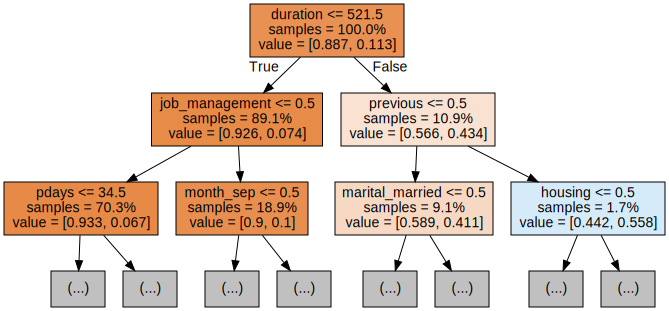

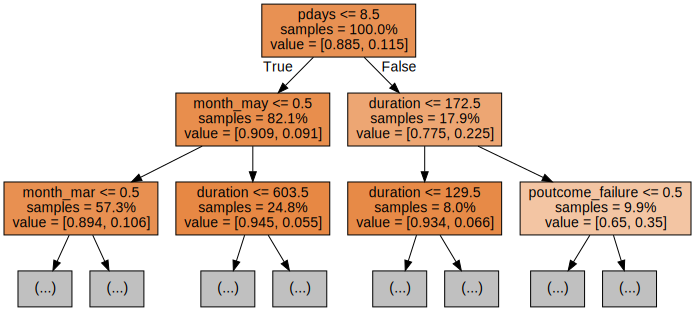

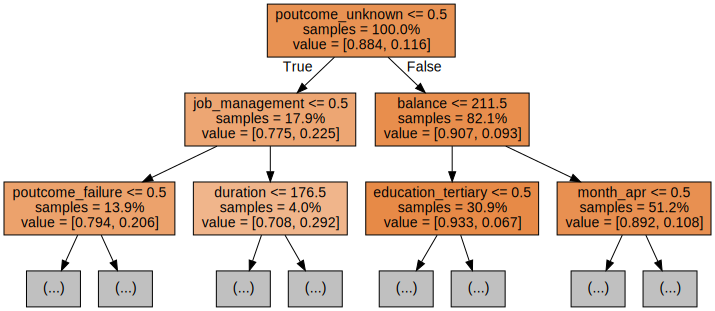

In [152]:

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [154]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5, n_jobs=3)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5, n_jobs=3,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000254374A0760>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025436BEB1F0>})

In [155]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 18, 'n_estimators': 299}


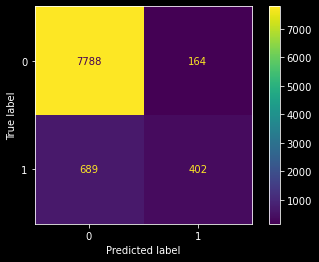

In [156]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

conda install -c conda-forge xgboost

In [ ]:
!conda install -c conda-forge xgboost

In [ ]:
https://archive.ics.uci.edu/ml/datasets/heart+disease

In [ ]:
import pandas as pd
df = pd.read_csv('data\heart_disease.csv')

df

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
X

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
cross_val_score(XGBClassifier(), X, y)

In [ ]:
Numeric features should be scaled
Categorical features should be encoded

In [ ]:
https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package
    

In [177]:
import pandas as pd

rain = pd.read_csv("data/weatherAUS.csv")
rain

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [178]:
cols_to_drop = ["Date", "Location", "RainTomorrow", "Rainfall"]

rain.drop(cols_to_drop, axis=1, inplace=True)

In [179]:
missing_props = rain.isna().mean(axis=0)

over_threshold = missing_props[missing_props >= 0.4]

In [180]:
rain.drop(over_threshold.index, 
          axis=1, 
          inplace=True)

In [182]:
rain['RainToday'] = rain['RainToday'].map({'No':0,'Yes':1})

In [183]:
X = rain.drop("RainToday", axis=1)
y = rain.RainToday

In [184]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    0.0
Name: RainToday, Length: 145460, dtype: float64

In [185]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

categorical_pipeline = Pipeline(
    steps=[
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("oh-encode", OneHotEncoder(handle_unknown="ignore", sparse=False)),
    ]
)

In [186]:
from sklearn.preprocessing import StandardScaler

numeric_pipeline = Pipeline(
    steps=[("impute", SimpleImputer(strategy="mean")), 
           ("scale", StandardScaler())]
)

In [187]:

cat_cols = X.select_dtypes(exclude="number").columns
num_cols = X.select_dtypes(include="number").columns

In [188]:
from sklearn.compose import ColumnTransformer

full_processor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_pipeline, num_cols),
        ("categorical", categorical_pipeline, cat_cols),
    ]
)

In [189]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()

In [190]:
X_processed = full_processor.fit_transform(X)
y_processed = SimpleImputer(strategy="most_frequent").fit_transform(
    y.values.reshape(-1, 1)
)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_processed, stratify=y_processed, random_state=1121218
)

In [191]:
from sklearn.metrics import accuracy_score

# Init classifier
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)


0.8507080984463082

In [192]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
_ = grid_cv.fit(X_processed, y_processed)

In [ ]:
 grid_cv.best_score_

----

In [ ]:
grid_cv.best_params_

# <span style="color: magenta">Ćwiczenie - dobrać jeszcze lepsze parametry (dla tych z końców zakresu) </span>

# Pipeline dla tekstu

In [103]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer 

data = pd.read_csv('data/adverts_29_04.csv', sep=';')
data['cena_za_metr'] = data['Cena'] / data['Wielkość (m2)']
data = data.dropna(subset=['cena_za_metr'])
df = data.drop(['Cena', 'Data dodania'], axis=1)
df

tfidf = TfidfVectorizer()
tfs = tfidf.fit_transform(df["opis"])
tfs

<986x16331 sparse matrix of type '<class 'numpy.float64'>'
	with 170858 stored elements in Compressed Sparse Row format>

In [104]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]


pipeline = Pipeline([
                ('selector', ItemSelector(key='opis')),
                ('tfidf', TfidfVectorizer()),
                ('best', TruncatedSVD(n_components=250)),
                ('linear', LinearRegression())
            ])

y = dum_df['cena_za_metr']
X = dum_df.drop(['cena_za_metr'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
scores = cross_val_score(pipeline, X_train, y_train, cv=3)
print(list(scores))
print()
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.06240613665936112, 0.06950410558272657, 0.10849680397632822]

Accuracy: 0.08 (+/- 0.04)


In [105]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from time import time
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

parameters = parameters = {
    'best__n_components': (250,),
    'svr__C': (100, 1000),
    'svr__kernel':('linear', 'rbf')
}

pipeline = Pipeline([
                ('selector', ItemSelector(key='opis')),
                ('tfidf', TfidfVectorizer()),
                ('best', TruncatedSVD()),
                ('svr', SVR())
            ])

grid_search = GridSearchCV(pipeline, parameters, verbose=1, cv=3, n_jobs=2)


y = dum_df['cena_za_metr']
X = dum_df.drop(['cena_za_metr'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=17)

t0 = time()
grid_search.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
done in 11.492s
Best parameters set:
	best__n_components: 250
	svr__C: 1000
	svr__kernel: 'linear'


In [109]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from operator import itemgetter

vectorizer = TfidfVectorizer(min_df=2)

X = vectorizer.fit_transform(X_train['opis'])



In [111]:
import gzip
import sys
import re
import re

splitter = re.compile(r'[^ąąćęńłóóśśżżź\w]+')
isnumber = re.compile(r'[0-9]')

f = gzip.open('data/odm.txt.gz', 'rt', encoding='utf-8')
dictionary = {}
set_dict= set()

for x in f:
    t = x.strip().split(',')
    tt = [ x.strip().lower() for x in t]
    for w in tt:
        set_dict.add(w)
        dictionary[w]=tt[0]

def lematize(w):
    w = w.replace('ą','ą')
    w = w.replace('ó','ó')
    w = w.replace('ę','ę')
    w = w.replace('ż','ż')
    return dictionary.get(w,w)

opis1 = dum_df['opis'][0]



raw_corpus=[]
n=0

for i in dum_df.iterrows():
    n+=1
    l = list(splitter.split(i[1][1]))
    raw_corpus.append(l)

    
all_words = []
for t in raw_corpus:
    all_words[0:0] = t

words = {}
for w in all_words:
    rec = words.get(w.lower(), {'upper':0, 'lower': 0})
    if w.lower()==w or w.upper()==w:
        rec['lower'] = rec['lower'] +1
    else: 
        rec['upper'] = rec['upper'] +1
    words[w.lower()] = rec

raw_stop_words = [ x for x in words.keys() if words[x]['upper']>=words[x]['lower']*4 ]   

set_raw_stop_words = set(raw_stop_words)



In [112]:
raw_stop_words[:20]

['niniejsza',
 'kodeksu',
 'cywilnego',
 'numer',
 '214370126lokalizacja',
 'mazowieckie',
 'warszawa',
 'bemowo',
 'wrocławska',
 'oferta',
 'trimo',
 'development',
 'lokal',
 'fresh',
 'lazurowa',
 'istotnym',
 'tesco',
 'wola',
 'górczewska',
 '211290126lokalizacja']

In [113]:
def preprocessing(opis, filter_raw=True, filter_dict=True):
    opis = str(opis)
    tokenized = splitter.split(opis)
    l = list(tokenized)
    l = [ x.lower() for x in l ]
    l = [ x for x in l if len(x) > 2]
    l = [ x for x in l if x.find('_') < 0]
    l = [ x for x in l if isnumber.search(x) is None ]
    if filter_raw: l = [ x for x in l if x not in set_raw_stop_words ]
    if filter_dict: l = [ x for x in l if x in set_dict ]
    l = [ lematize(x) for x in l ]
    l = [ x for x in l if len(x) > 2]
    return l

In [114]:
opis1

'CO] - gotowiec inwestycyjny KUP I ZARABIAJ \n\r\n [GDZIE] - Warszawa, Praga-Północ , Targowa 70\n\r\n [OPIS] - Oferujemy wyremontowane mieszkanie składające się z 4 \r\nniezależnych pokoi , 1 łazienka (prysznic ),WC , oddzielnej kuchni . \r\nprzychód roczny na poziomie 6% netto (już po odjęciu czynszu \r\noczywiście ). \n\r\nDobra komunikacja \r\nMetro Wileńska przy wyjściu z budynku\n\r\nObok Galeria Wileńska , liczne sklepy \r\nw pobliżu park i zoo\n\r\nMieszkanie jest umeblowane i ma sprzęt AGD \n\r\nMieszkanie własnościowe z KW . \n\r\nAmortyzacja przyśpieszona 10%\n\r\n CHĘTNIE ZAJMIEMY SIĘ ZARZĄDZANIEM NAJMU W TEJ INWESTYCJI \n\r\n Pozwól nam pracować i zarabiać też , a sobie pozwól na wakacje i na lokatę wyższą niż w banku \n \r\nJarek 608840585'

In [115]:
print(preprocessing(opis1))

['gotowiec', 'inwestycyjny', 'kupić', 'zarabiać', 'gdzie', 'północ', 'opis', 'wyremontować', 'mieszkanie', 'pokój', 'łazienka', 'prysznic', 'oddzielny', 'kuchnia', 'roczny', 'poziom', 'netto', 'czynsz', 'dobry', 'komunikacja', 'metro', 'przy', 'wyjść', 'budynek', 'obok', 'galeria', 'liczny', 'sklep', 'pobliże', 'park', 'zoo', 'mieszkanie', 'być', 'umeblować', 'agd', 'mieszkanie', 'przyśpieszyć', 'zająć', 'najem', 'ten', 'inwestycja', 'siebie', 'wakacje', 'bank']


In [116]:
print(preprocessing(opis1, filter_raw=False))

['gotowiec', 'inwestycyjny', 'kupić', 'zarabiać', 'gdzie', 'warszawa', 'praga', 'północ', 'targowy', 'opis', 'oferować', 'wyremontować', 'mieszkanie', 'pokój', 'łazienka', 'prysznic', 'oddzielny', 'kuchnia', 'roczny', 'poziom', 'netto', 'czynsz', 'dobry', 'komunikacja', 'metro', 'wileński', 'przy', 'wyjść', 'budynek', 'obok', 'galeria', 'wileński', 'liczny', 'sklep', 'pobliże', 'park', 'zoo', 'mieszkanie', 'być', 'umeblować', 'agd', 'mieszkanie', 'amortyzacja', 'przyśpieszyć', 'zająć', 'najem', 'ten', 'inwestycja', 'siebie', 'wakacje', 'bank', 'jarka']


In [117]:
print(preprocessing(opis1, filter_dict=False))

['gotowiec', 'inwestycyjny', 'kupić', 'zarabiać', 'gdzie', 'północ', 'opis', 'wyremontować', 'mieszkanie', 'składać', 'się', 'zależny', 'pokój', 'łazienka', 'prysznic', 'oddzielny', 'kuchnia', 'przychód', 'roczny', 'poziom', 'netto', 'już', 'odjąć', 'czynsz', 'oczywiście', 'dobry', 'komunikacja', 'metro', 'przy', 'wyjść', 'budynek', 'obok', 'galeria', 'liczny', 'sklep', 'pobliże', 'park', 'zoo', 'mieszkanie', 'być', 'umeblować', 'sprzęt', 'agd', 'mieszkanie', 'własnościowe', 'przyśpieszyć', 'chętny', 'zająć', 'się', 'zarządzać', 'najem', 'ten', 'inwestycja', 'pozwolić', 'pracować', 'zarabiać', 'też', 'siebie', 'pozwolić', 'wakacje', 'lokata', 'wyższy', 'niż', 'bank']


In [118]:
print(preprocessing(opis1, filter_raw=False, filter_dict=False))

['gotowiec', 'inwestycyjny', 'kupić', 'zarabiać', 'gdzie', 'warszawa', 'praga', 'północ', 'targowy', 'opis', 'oferować', 'wyremontować', 'mieszkanie', 'składać', 'się', 'zależny', 'pokój', 'łazienka', 'prysznic', 'oddzielny', 'kuchnia', 'przychód', 'roczny', 'poziom', 'netto', 'już', 'odjąć', 'czynsz', 'oczywiście', 'dobry', 'komunikacja', 'metro', 'wileński', 'przy', 'wyjść', 'budynek', 'obok', 'galeria', 'wileński', 'liczny', 'sklep', 'pobliże', 'park', 'zoo', 'mieszkanie', 'być', 'umeblować', 'sprzęt', 'agd', 'mieszkanie', 'własnościowe', 'amortyzacja', 'przyśpieszyć', 'chętny', 'zająć', 'się', 'zarządzać', 'najem', 'ten', 'inwestycja', 'pozwolić', 'pracować', 'zarabiać', 'też', 'siebie', 'pozwolić', 'wakacje', 'lokata', 'wyższy', 'niż', 'bank', 'jarka']


In [119]:
dum_df["opisTT"] = dum_df["opis"].apply(lambda x: ' '.join(preprocessing(x,filter_raw=True, filter_dict=True)))
dum_df["opisTF"] = dum_df["opis"].apply(lambda x: ' '.join(preprocessing(x,filter_raw=True, filter_dict=False)))
dum_df["opisFT"] = dum_df["opis"].apply(lambda x: ' '.join(preprocessing(x,filter_raw=False, filter_dict=True)))
dum_df["opisFF"] = dum_df["opis"].apply(lambda x: ' '.join(preprocessing(x,filter_raw=False, filter_dict=False)))

---
# Pipeline kompozytowy

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from time import time
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import FeatureUnion

class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key=''):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

class ItemUnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, keys=[]):
        self.keys = keys

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict.drop(self.keys, axis=1)


pipeline = Pipeline([
   ('union', 
        FeatureUnion(
            transformer_list=[
                ('table', 
                    Pipeline([
                        ('selector1', ItemUnSelector(keys=['opis', 'opisTT', 'opisTF', 'opisFT', 'opisFF'])),
                        ('scaler1', 'passthrough')
                    ])
                ),
                ('description', 
                    Pipeline([
                        ('selector2', ItemSelector()),
                        ('tfidf', TfidfVectorizer()),
                        ('best', TruncatedSVD()),
                        ('scaler2', 'passthrough')
                    ])
                )
            ]
        )    

   ),
   ('regressor', 
        TransformedTargetRegressor()
    )
])

parameters = parameters = {
    'union__transformer_weights': [  { 'table': 1.0, 'description': 1.0}],

    'union__description__best__n_components': (700,),
    'union__description__tfidf__min_df': (3,),
    'union__description__tfidf__binary': (True,),
    'union__description__selector2__key': [ 'opisFF'] ,
    
    'union__table__scaler1': [ RobustScaler()],
    'union__description__scaler2': [ RobustScaler(with_centering=False)],
    
    'regressor': [ GradientBoostingRegressor()] ,
}

grid_search = GridSearchCV(pipeline, parameters, verbose=1, cv=10, n_jobs=4)


y = dum_df['cena_za_metr']
X = dum_df.drop(['cena_za_metr'], axis=1)

t0 = time()
grid_search.fit(X, y)
print("done in %0.3fs" % (time() - t0))

print(f'Best score: {grid_search.best_score_}')

print("Best parameters set:")
print()
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

---
## Problemy z trenowaniem modelu


### To ile tych prób możemy mieć ?

- 3 zestawy wag `union`
- 6 zestawów wymiarów SVD
- 6 zestawów parametrów TF-IDF
- 4 zbiory danych tekstowych
- 4 mechanizmy skalowania części `table`
- 4 mechanizmy skalowania części `description`
- 3 regresory
- 10 walidacji krzyżowych

In [40]:
3*6*6*4*4*4*3*10

207360

powiedzmy - że 3 na minutę

In [41]:
3*6*6*4*4*4*3*10/3/60/24

48.0

# Grid Strategies
- ## HalvingGridSearchCV
  - Przeszukiwanie przez podział binarny

- ## RandomizedSearchCV
  - W odróżnieniu do `GridSearchCV`, nie wszystkie parametry są sprawdzane, ale `n_iter` z pewnego rozkładu
  - Jeśli parametry są na liście - losowanie bez zwracania jest dokonane 
  
- ## HalvingRandomSearchCV
  - Parametry są przeszukiwane losowo z coraz węższego zakresu
  
- ## <span style="color: cyan">auto-sklearn</span> 
  - używa nauczana maszynowego do wyboru algorytmu i dobrania hiperparametrów


---

# Podsumowanie

- ## Inżynieria cech i przygotowanie danych to zestaw arbitralnych decyzji
- ## Te decyzje muszą być walidowane
- ## __*Inżynieria cech*__ jest częścią modelu
- ## Uwaga na <span style="color: red">Eksplozję kombinatoryczną</span>

# Bibliografia
- ## [Efficient and Robust Automated Machine Learning](https://papers.nips.cc/paper/5872-efficient-and-robust-automated-machine-learning.pdf) - __*Matthias Feurer, Aaron Klein, Katharina Eggensperger, Jost Springenberg, Manuel Blum and Frank Hutter*__ Advances in Neural Information Processing Systems 28 (2015)